## Linear Regression: Prostate Cancer Example

The data below comes from a study by Starney et al(1989) wich examines the correlation between the level of prostatespecific antigen(PSA). The example is covered is section 3.2.1 if Haste et al. Elements of Statistical Learning.

First let's load the dataset and see example data from each column. 

Note: For the computation of Z-scores, we may need to update Pandas( we must have >0.24.1) 


## Data Exploration and Understanding

In [109]:
import pandas as pd
df = pd.read_csv('https://hastie.su.domains/ElemStatLearn/datasets/prostate.data', sep='\t')

In [110]:
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [111]:
df_train = df[df['train']=='T']
df_test = df[df['train']=='F']

Split the data into training and test samples. 67 samples for training and 30 for testing. 

In [112]:
df_train.shape

(67, 10)

In [113]:
df_test.shape

(30, 10)

Next we look at the pairwise correlations for each pair of variables.

In [114]:
df_train.corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.300232,0.286324,0.063168,0.592949,0.692043,0.426414,0.483161,0.733155
lweight,0.300232,1.000000,0.316723,0.437042,0.181054,0.156829,0.023558,0.074166,0.485215
age,0.286324,0.316723,1.000000,0.287346,0.128902,0.172951,0.365915,0.275806,0.227642
lbph,0.063168,0.437042,0.287346,1.000000,-0.139147,-0.088535,0.032992,-0.030404,0.262938
svi,0.592949,0.181054,0.128902,-0.139147,1.000000,0.671240,0.306875,0.481358,0.556886
lcp,0.692043,0.156829,0.172951,-0.088535,0.671240,1.000000,0.476437,0.662533,0.489203
gleason,0.426414,0.023558,0.365915,0.032992,0.306875,0.476437,1.000000,0.757056,0.342428
pgg45,0.483161,0.074166,0.275806,-0.030404,0.481358,0.662533,0.757056,1.000000,0.448048
lpsa,0.733155,0.485215,0.227642,0.262938,0.556886,0.489203,0.342428,0.448048,1.000000


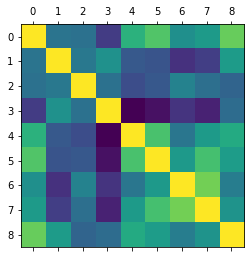

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(df_train.corr())

In [116]:
df.describe().loc[['mean', 'std']]

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329


## Linear Regression: Training, Evaluation, Feature Importance
In the next dataset we wil use Python's scikitlearn library. Import the library and create an instance of a Linear Regression class.

In [117]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [118]:
regr = linear_model.LinearRegression()

Normalize features to have mean 0 and standard deviation of 1, up to computational errors.

In [119]:
scaler = StandardScaler()
def normalize(df):
    iterator = pd.DataFrame(df.iloc[:,:-1]).items()
    for column,_ in iterator:
        column_data = pd.DataFrame(df[column])
        new_column_array = scaler.fit_transform(column_data)
        df[columns] = pd.DataFrame(new_column_array)
    return df

df.describe().loc[['mean', 'std']]
df.head(10)


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
5,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468,T
6,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468,F
7,0.693147,3.539509,58,1.536867,0,-1.386294,6,0,0.854415,T
8,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319,F
9,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319,F


In [120]:
train = df['train']
df = (df.drop(columns=['train']))
df['train'] = train

In [121]:
df.describe().loc[['mean', 'std']]

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329


In [122]:
df_train = df[df['train']=='T']
df_test = df[df['train']=='F']

## Creating the inputs and targets
Separate the data into features that we are use for inputs and the target variable.

In [123]:
train_features = df_train.loc[:,'lcavol':'pgg45']
train_targets = df_train.loc[:,'lpsa']

In [124]:
test_features = df_train.loc[:,'lcavol':'pgg45']
test_targets = df_train.loc[:,'lpsa']

An example of a vector in the training set, and an example target variable.

In [125]:
train_features.head(1)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0


In [126]:
train_targets.head(1)

0   -0.430783
Name: lpsa, dtype: float64

In [127]:
test_features.head(1)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0


In [128]:
test_targets.head(1)

0   -0.430783
Name: lpsa, dtype: float64

## Training the model
Training the model is a one-line call to fit.

In [129]:
regr.fit(train_features, train_targets)

LinearRegression()

## Evaluating the model
Evaluate the model using the test set, creating targets predictions. Ultimately the target prediction values to the targets in the set. 

In [130]:
target_predict = regr.predict(test_features)

In [131]:
print("Mean squared error: %.2f" % np.mean((target_predict - test_targets) ** 2))
print("RSS: %.2f" %np.sum((target_predict - test_targets) ** 2))
print('Variance score: %.2f' % regr.score(train_features, train_targets))

Mean squared error: 0.44
RSS: 29.43
Variance score: 0.69


In [132]:
mean_squared_error(target_predict, test_targets)

0.43919976805833433

In [133]:
def z_score(x_train, y_true, y_pred, beta_hat):

    N = len(y_true)
    p = x_train.shape[1] - 1
    variance_y_est = (1/(N-p-1)) * np.sum(np.square(y_true - y_pred))
    diag = np.diag(np.linalg.inv(np.matmul(np.transpose(x_train), x_train)))
    z = (1/np.sqrt(variance_y_est)) * np.multiply(beta_hat, np.sqrt(1/diag))
    return  z

In [134]:
y_pred = regr.predict(train_features)

beta_hat = regr.coef_
beta_hat = np.concatenate([np.array([regr.intercept_]), beta_hat])

column_of_ones = np.ones((train_features.shape[0],1))
x = np.concatenate([column_of_ones, train_features], axis = 1)

columns = ['Intercept'] + train_features.columns.to_list()
zscores = np.array([z_score(x, train_targets.to_numpy(), y_pred, beta_hat)])
zscores_df = pd.DataFrame(data=zscores, columns=columns, index=['z-score'])
zscores_df

,Intercept,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
z-score,0.276244,5.36629,2.750789,-1.395909,2.055846,2.469255,-1.866913,-0.146681,1.73784


## Dropping less significant features
On of the advantages of a linear regression model is that it is interpretabel.

First estimated coefficients.

In [135]:
print('Intercept: \n', regr.intercept_, '\nCoefficients: \n', regr.coef_)

Intercept: 
 0.42917013284911754 
Coefficients: 
 [ 0.57654319  0.61402    -0.01900102  0.14484808  0.73720864 -0.20632423
 -0.02950288  0.00946516]


Training the model of fewer features actually reduces mean error.

In [136]:
train_features_small = df_train.loc[:,['lweight', 'svi']]
test_features_small = df_test.loc[:, ['lweight', 'svi']]
regr.fit(train_features_small,train_targets)
target_predict_small = regr.predict(test_features_small)

In [106]:
print("Mean squared error: %.2f" % np.mean((target_predict_small - test_targets) ** 2))
print("RSS: %.2f" %np.sum((target_predict_small - test_targets) **2))
print('Variance score: %.2f' % regr.score(train_features_small, train_targets))

ValueError: operands could not be broadcast together with shapes (30,) (67,) 

In [101]:
print("Mean squared error: %.2f" % np.mean((target_predict_small - test_targets) ** 2))
print("RSS: %.2f" %np.sum((target_predict_small - test_targets) ** 2))
print('Variance score: %.2f' % regr.score(train_features_small, train_targets))

ValueError: operands could not be broadcast together with shapes (30,) (67,) 